## We will cover the following topics:
*  Representing an image

*  Why leverage neural networks for image analysis?

*  Preparing data for image classification

*  Training a neural network

*  Scaling a dataset to improve model accuracy

*  Understanding the impact of varying the batch size

*  Understanding the impact of varying the loss optimizer

*  Understanding the impact of varying the learning rate

*  Understanding the impact of learning rate annealing

*  Building a deeper neural network

*  Understanding the impact of batch normalization

*  The concept of overfitting

# Representing an image

 * A digital image file is made up an array of pixels, with grayscale images having single values between 0 and 255 (0 is black, 255 is white), while color images have three-dimensional vectors representing red, green, and blue channels.

 * An image has height x width x c pixels, where height is the number of rows, width is the number of columns, and c is 3 for color images and 1 for grayscale.
 
 * A pixel value of 0 is black, and 255 is pure white for grayscale or pure red/green/blue in the respective channel for a color image.

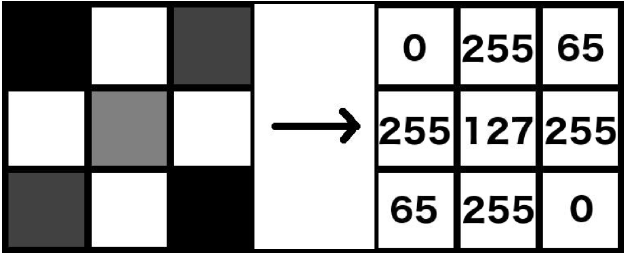


# Converting images into structured arrays and scalars

In [1]:
# 1. Download a sample image
! wget https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg

--2023-10-25 20:57:38--  https://www.dropbox.com/s/l98leemr7r5stnm/Hemanvi.jpeg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/l98leemr7r5stnm/Hemanvi.jpeg [following]
--2023-10-25 20:57:38--  https://www.dropbox.com/s/raw/l98leemr7r5stnm/Hemanvi.jpeg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc227dcd5a40496c961933a2cada.dl.dropboxusercontent.com/cd/0/inline/CGRzqvObdvpYKExPecFQA4OWAHNWlhAsejxRdFt7IXU4uL0IhreTnLFDydmy5WLJaJMu0dtOfO1Yb1d506LR2uVIWloNfIaW0u6AtBu7Awj9qMqvOWIrTSnl5R0CKllwJPeh2_ypLzu_9ghei-Zejl8w/file# [following]
--2023-10-25 20:57:40--  https://uc227dcd5a40496c961933a2cada.dl.dropboxusercontent.com/cd/0/inline/CGRzqvObdvpYKExPecFQA4OWAHNWlhAsejxRdFt7IXU4uL0IhreTnLFDydmy5WLJaJMu0dtOfO1Yb1d506LR2uVIWloNfIaW0u6

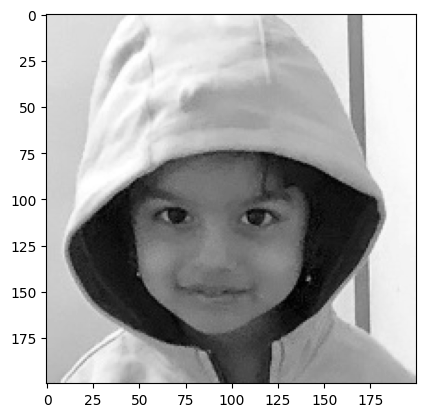

In [2]:
# 2. Import libraries and read the downloaded image into the Python environment
import cv2
import matplotlib.pyplot as plt

img =cv2.imread('Hemanvi.jpeg')  # This converts an image into an array of pixel

# 3. We'll crop the image between 50th-250th rows, as well as 40th-240th  and convert the image into grayscale
img = img[50:250, 40:240]
img_gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

# # Show image
plt.imshow(img_gray,  cmap='gray')
plt.show()

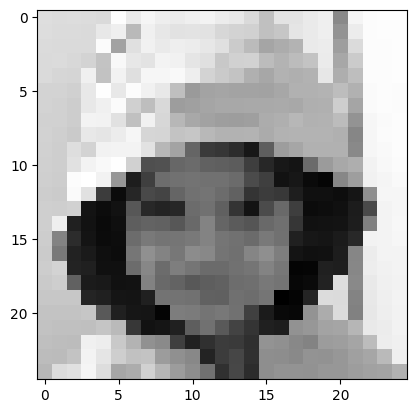

In [3]:
# 4. Convert the image into a 25 x 25 array and plot it
img_gray_small = cv2.resize(img_gray , (25,25))
plt.imshow(img_gray_small, cmap='gray')
plt.show()

* Having fewer pixels to represent the same image results in a blurrier output.

In [4]:
# 5. Let's inspect the pixel values
img_gray_small

array([[222, 220, 221, 220, 218, 253, 234, 245, 238, 235, 239, 243, 236,
        232, 218, 193, 228, 228, 234, 239, 139, 245, 252, 253, 253],
       [221, 219, 219, 218, 232, 239, 186, 240, 231, 226, 227, 226, 215,
        212, 209, 193, 199, 229, 234, 239, 150, 236, 252, 253, 253],
       [219, 218, 218, 218, 251, 163, 224, 241, 234, 238, 236, 231, 224,
        204, 188, 166, 173, 180, 234, 236, 159, 219, 252, 252, 253],
       [218, 219, 216, 211, 196, 248, 231, 228, 243, 241, 229, 224, 201,
        209, 210, 189, 181, 189, 196, 235, 168, 204, 252, 252, 253],
       [218, 214, 213, 240, 195, 242, 223, 246, 246, 249, 238, 211, 203,
        196, 177, 168, 179, 176, 179, 231, 175, 191, 252, 252, 253],
       [212, 212, 208, 232, 254, 232, 252, 241, 232, 192, 155, 164, 166,
        165, 164, 163, 168, 178, 178, 181, 190, 178, 250, 252, 251],
       [211, 209, 205, 232, 240, 251, 208, 191, 217, 158, 161, 166, 169,
        169, 170, 170, 171, 169, 176, 177, 206, 166, 250, 252, 251],
      

**Note** that in the preceding code, we have reordered the channels using the cv2.cvtcolor method. We've done this because when we import images using cv2, the channels are ordered as Blue first, Green next,and finally Red; typically, we are used to looking at images in RGB channels, where the sequence is Red, Green, and then Blue.

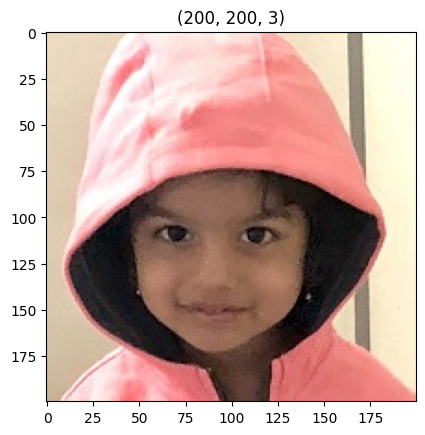

In [6]:
# working on colored img
img =cv2.imread('Hemanvi.jpeg') 
img = img[50:250,40:240,:]
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# Plot the image
plt.imshow(img)
plt.title(f'{img.shape}')
plt.show()

[[[242 149 141]
  [249 161 151]
  [239 161 148]]

 [[239 145 135]
  [244 150 140]
  [247 159 149]]

 [[239 145 135]
  [242 148 138]
  [245 153 142]]]


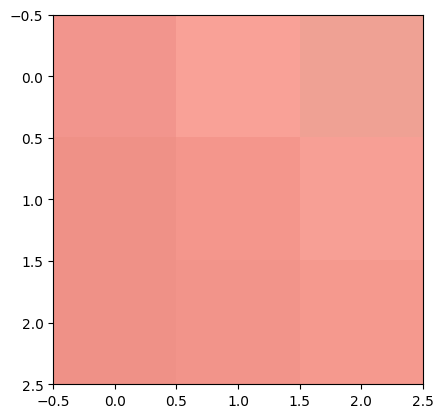

In [8]:
# The bottom-right 3 x 3 array of pixels
crop_img = img[-3:,-3:]

# print and plot crop_img
print(crop_img)
plt.imshow(crop_img)
plt.show()

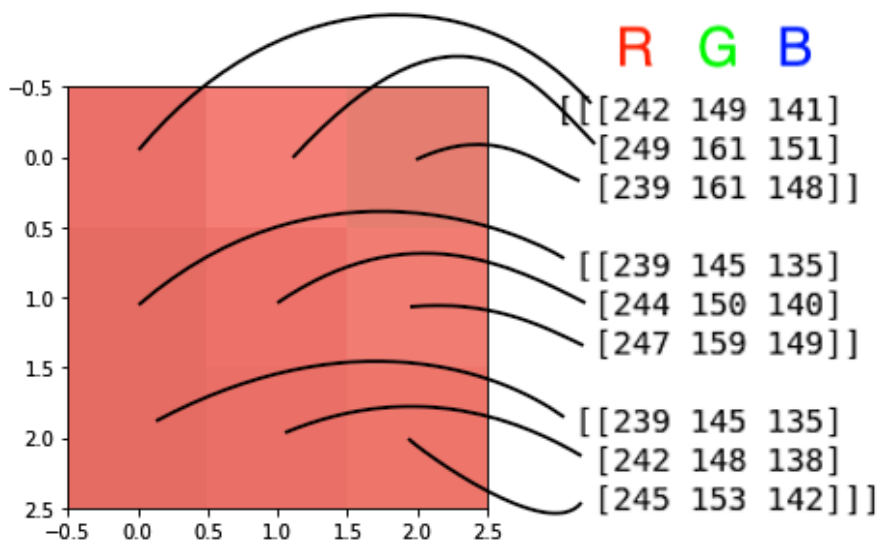

    Converting an image into a structured array of numbers allows us to perform mathematical operations on images, enabling tasks like classification, detection, and segmentation through various techniques, leveraging the numerical representation of images.






# Why leverage neural networks for image analysis?